<a href="https://colab.research.google.com/github/Deflee-Ratan/Recognition_of_objects/blob/main/Recognition_of_Objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries**

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import  numpy as np

# **2. Loading and Splitting Data**

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))
print(X_train[0].shape)

170508288/170498071 [==============================] - 3s 0us/step
Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)
(32, 32, 3)


**Displaying the Data**

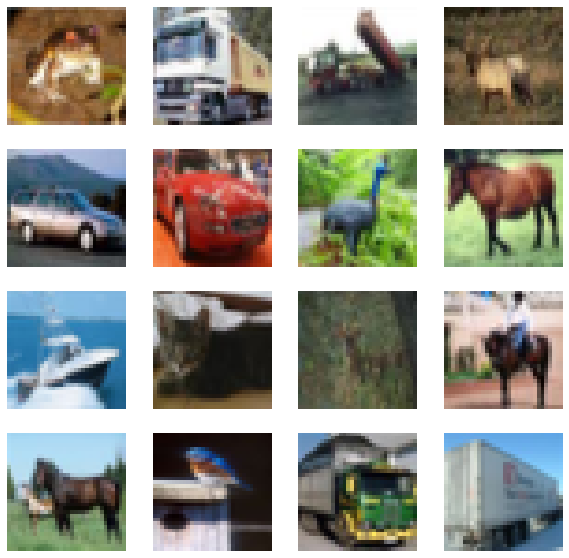

In [ ]:
#%matplotlib inline
fig, axs = plt.subplots(4, 4, figsize = (10, 10))

for i, ax in enumerate(axs.flat):
    ax.matshow(X_train[i])
    ax.axis('off')
   

# **3. Preprocessing of Data**

In [ ]:
# reshape
X_train = X_train.reshape(X_train.shape[0], 32,32,3)
X_test = X_test.reshape(X_test.shape[0], 32,32,3)

In [ ]:
# Normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

no_of_classes = 10

In [ ]:
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, no_of_classes)
Y_test = np_utils.to_categorical(y_test, no_of_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


# **4. Building the Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# **5. Train the model**

In [ ]:
# training the model
model.fit(X_train, Y_train, batch_size=128, epochs=10)

Epoch 1/10
391/391 [==============================] - 559s 1s/step - loss: 1.5998 - accuracy: 0.4139
Epoch 2/10
391/391 [==============================] - 550s 1s/step - loss: 1.0931 - accuracy: 0.6142
Epoch 3/10
391/391 [==============================] - 542s 1s/step - loss: 0.9153 - accuracy: 0.6802
Epoch 4/10
391/391 [==============================] - 545s 1s/step - loss: 0.7958 - accuracy: 0.7234
Epoch 5/10
391/391 [==============================] - 547s 1s/step - loss: 0.7235 - accuracy: 0.7493
Epoch 6/10
391/391 [==============================] - 544s 1s/step - loss: 0.6584 - accuracy: 0.7700
Epoch 7/10
221/391 [===============>..............] - ETA: 3:58 - loss: 0.5942 - accuracy: 0.7914

In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=5)

Epoch 1/5
391/391 [==============================] - 522s 1s/step - loss: 0.2639 - accuracy: 0.9085
Epoch 2/5
391/391 [==============================] - 521s 1s/step - loss: 0.2459 - accuracy: 0.9144
Epoch 3/5
391/391 [==============================] - 521s 1s/step - loss: 0.2414 - accuracy: 0.9156
Epoch 4/5
391/391 [==============================] - 530s 1s/step - loss: 0.2315 - accuracy: 0.9193
Epoch 5/5
391/391 [==============================] - 521s 1s/step - loss: 0.2246 - accuracy: 0.9205


In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=5)

Epoch 1/5
391/391 [==============================] - 527s 1s/step - loss: 0.2221 - accuracy: 0.9210
Epoch 2/5
391/391 [==============================] - 525s 1s/step - loss: 0.2174 - accuracy: 0.9240
Epoch 3/5
391/391 [==============================] - 528s 1s/step - loss: 0.2098 - accuracy: 0.9287
Epoch 4/5
391/391 [==============================] - 522s 1s/step - loss: 0.2082 - accuracy: 0.9272
Epoch 5/5
391/391 [==============================] - 526s 1s/step - loss: 0.2015 - accuracy: 0.9305


# **6. Evaluate the model**

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 29s 92ms/step - loss: 0.7225 - accuracy: 0.7947
Test loss: 0.7225278615951538
Test accuracy: 0.794700026512146


# **7. Predict the model**

In [ ]:
classes = range(0,10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[10:19]
labels = np.argmax(Y_test[10:19],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 1s 572ms/step


In [ ]:
print(predictions)

[[7.8075695e-01 2.6796959e-05 7.8491271e-02 6.4679697e-02 6.5123931e-02
  6.3008666e-03 2.3618371e-03 1.2700908e-03 9.0865477e-04 7.9979429e-05]
 [2.0774863e-16 4.0998305e-08 2.7556584e-23 3.5342010e-19 1.2547305e-23
  1.0245819e-22 2.1501170e-22 3.4681395e-22 7.7325358e-15 1.0000000e+00]
 [5.0146387e-05 2.0044910e-05 3.9652571e-02 1.4188862e-01 3.5618071e-03
  7.7522916e-01 1.5414375e-04 3.9387766e-02 2.5592248e-05 3.0209296e-05]
 [3.0391181e-17 3.0194273e-17 2.5586297e-12 4.5569065e-14 1.2699610e-09
  7.7986790e-09 6.3703442e-16 1.0000000e+00 1.1317767e-19 3.8483198e-16]
 [6.6511846e-14 3.6387668e-08 1.5274688e-20 4.6768944e-20 8.6612868e-22
  3.0190757e-21 2.6150271e-20 1.9067694e-19 2.9676429e-16 1.0000000e+00]
 [3.4966074e-06 2.1329024e-06 1.8658064e-05 2.0904579e-06 5.0064618e-06
  5.7863585e-11 9.1062534e-01 2.0349007e-09 8.9343220e-02 3.9472095e-08]
 [1.2300616e-11 1.2077882e-13 8.6553209e-09 3.7650017e-05 1.7763871e-15
  9.9996233e-01 6.9628647e-10 5.3016674e-10 1.4306627e-11 

In [ ]:
for image in predictions:
  print(np.sum(image))

1.0000001
1.0
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[0 9 5 7 9 6 5 7 8]


# **Final Object Detection**

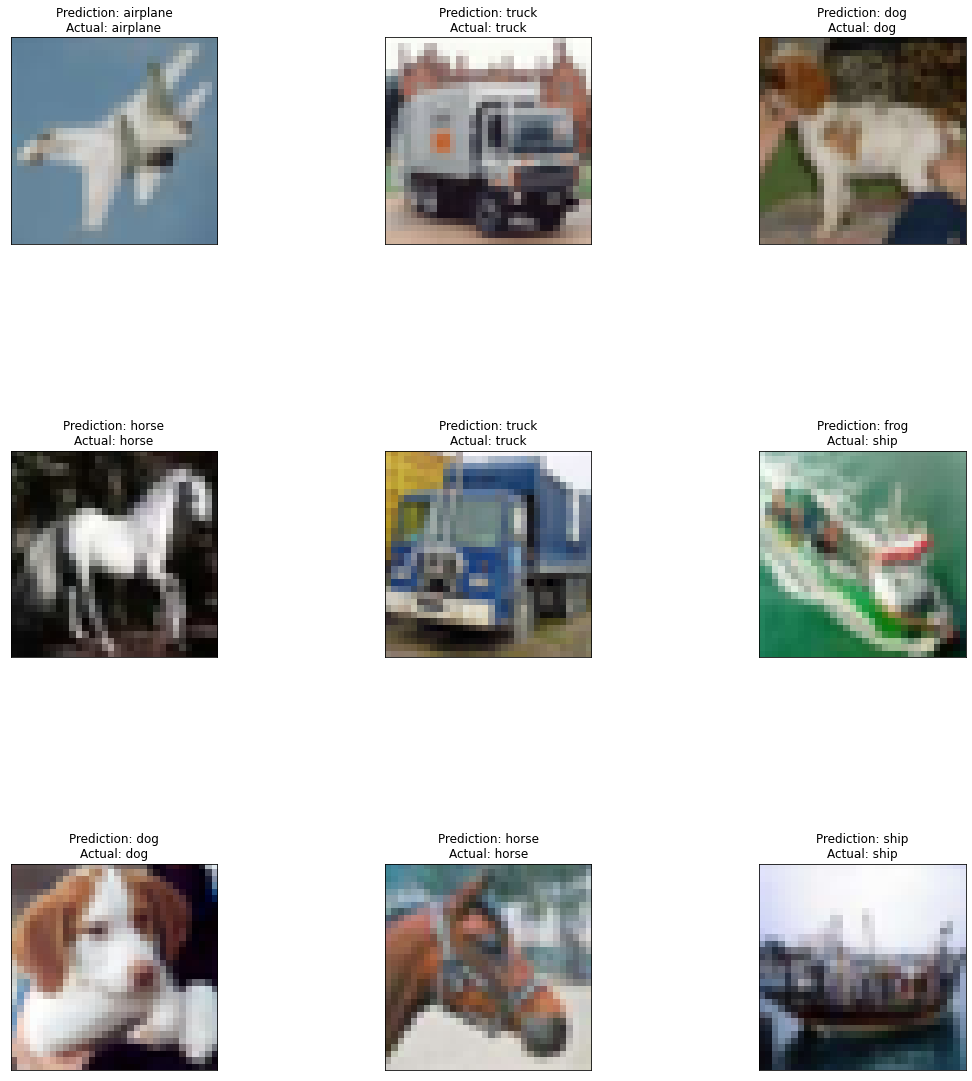

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (19,19))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()
for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
  

  # plot the image
  axs[i].imshow(img)

# show the plot
plt.show()
